In [1]:
import pandas as pd
import numpy as np
import json
import xmltodict

import seaborn as sns
import matplotlib.pyplot as plt
import glob as glob

from collections import Counter
import matplotlib.font_manager as fm

## 1. Functions

### 1. Display Question Pool

In [2]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format


def level_value_and_labels(file_path, subject_name):
    with open(file_path) as fd:
        doc = xmltodict.parse(fd.read())

    df_xml1 = pd.DataFrame(doc['quiz'])
    df_xml1

    columns_name = df_xml1['question'][0].keys()

    data = []
    subject_xml1_df = pd.DataFrame(data, columns=columns_name)

    for i in range(len(df_xml1)):
        subject_xml1_df.loc[i] = df_xml1['question'][i]

    names = []
    for i in range(len(subject_xml1_df)):
        names.append(subject_xml1_df['name'][i]['text'])

    subject_xml1_df['name'] = names

    level = []
    q_type = []
    for i in range(len(subject_xml1_df)):
        if(pd.isna(subject_xml1_df['tags'][i])):
            level.append('pending')
            q_type.append('pending')
        else:
            level_object = str(subject_xml1_df['tags'][i]['tag'])

            if('l1' in level_object or 'L1' in level_object):
                level.append('L1')
            elif('l2' in level_object or 'L2' in level_object):
                level.append('L2')
            elif('l3' in level_object or 'L3' in level_object):
                level.append('L3')
            elif('pending' in level_object or 'Pending' in level_object):
                level.append('pending')
            else:
                level.append('reviewing')

            
            if('exam' in level_object or 'Exam' in level_object):
                q_type.append('exam')
            elif('quiz' in level_object or 'Quiz' in level_object):
                q_type.append('quiz')
            elif('pretest' in level_object or 'Pretest' in level_object):
                q_type.append('pretest')
            elif('pending' in level_object or 'Pending' in level_object):
                q_type.append('pending')
            elif('review' in level_object or 'Review' in level_object):
                q_type.append('review')
            else:
                q_type.append(None)

    print("Total Number of Question:", len(level))

    subject_xml1_df['level'] = level
    subject_xml1_df['q_type'] = q_type

    level = subject_xml1_df['level'].value_counts()

    # declaring data 
    data = level.values
    keys = list(level.keys())

    plt.figure(figsize=(6,6))

    # plotting data on chart 
    # plt.pie(data, labels=keys, autopct='%.0f%%')
    plt.pie(data, labels=keys, autopct=autopct_format(data))

    # Set the legend
    plt.legend(title="Level", loc='upper left')

    # plt.title("Proportion of Question Difficulty")
    plt.title(subject_name)

    # displaying chart 
    plt.show()

    # return [[l1,l2,l3], labels]
    return [keys, data]

### 2. Display Questionstats

In [3]:
def display_questionstat(path):
    print(path)
    df_q_state = pd.read_excel(path, sheet_name=1)
    df_q_state.columns = df_q_state.columns.str.lower()

    facility_index_rate = []
    for facility_index in df_q_state['facility index']:
        facility_index = facility_index[:-1]
        # print(facility_index)
        facility_index_rate.append(float(facility_index))

    df_q_state['facility index'] = facility_index_rate

    df_q_state.loc[df_q_state['facility index'] <= float(60), 'label_facility_index'] = 'L3'
    df_q_state.loc[(df_q_state['facility index'] > float(60)) & (df_q_state['facility index'] <= float(80)), 'label_facility_index'] = 'L2'
    df_q_state.loc[(df_q_state['facility index'] > float(80)) & (df_q_state['facility index'] <= float(100)), 'label_facility_index'] = 'L1'

    level = df_q_state['label_facility_index'].value_counts()

    # fetch the name of font that was installed
    path = './font/KhmerOS.ttf'
    fontprop = fm.FontProperties(fname=path)

    # declaring data 
    data = list(level.values)
    keys = list(level.keys())

    plt.figure(figsize=(6,6))

    # plotting data on chart 
    plt.pie(data, labels=keys, autopct='%.0f%%')
    # plt.pie(data, labels=keys, autopct=autopct_format(data))

    # Set the legend
    plt.legend(title="Level", loc='upper left')

    # plt.title("Proportion of Question Difficulty")
    # plt.title('Question Difficulty Level QuestionStats')
    # plt.title(title)
    # plt.title(title, fontproperties=fontprop)

    # displaying chart 
    plt.show()

    # return [[l1,l2,l3], labels]
    return [keys, data]


## 2. Read XML

In [4]:
with open('./data_source_xml/1.xml') as fd:
    doc = xmltodict.parse(fd.read())

df_xml1 = pd.DataFrame(doc['quiz'])
df_xml1.head(3)

,question
0,"{'@type': 'ddmarker', 'name': {'text': 'Mainbo..."
1,"{'@type': 'ddwtos', 'name': {'text': 'jc-q18'}..."
2,"{'@type': 'matching', 'name': {'text': 'File E..."


### Create Dataframe from XML file

In [5]:
columns_name = df_xml1['question'][0].keys()
# print(columns_name)

data = []
subject_xml1_df = pd.DataFrame(data, columns=columns_name)

for i in range(len(df_xml1)):
    subject_xml1_df.loc[i] = df_xml1['question'][i]

# subject_xml1_df.head(3)

### Clean Question Name

In [6]:
names = []
for i in range(len(subject_xml1_df)):
    names.append(subject_xml1_df['name'][i]['text'])

subject_xml1_df['name'] = names
subject_xml1_df.head(3)

,@type,name,questiontext,generalfeedback,defaultgrade,penalty,hidden,idnumber,correctfeedback,partiallycorrectfeedback,incorrectfeedback,shownumcorrect,file,drag,drop,tags
0,ddmarker,Mainboard-003,"{'@format': 'html', 'text': '1.Question 1'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,"{'@name': 'computer-motherboard-500x500.jpg', ...","[{'no': '1', 'text': 'កន្លែង​ដាក់​ CPU', 'noof...","[{'no': '1', 'shape': 'rectangle', 'coords': '...","{'tag': [{'text': 'exam'}, {'text': 'L2'}, {'t..."
1,ddwtos,jc-q18,"{'@format': 'html', 'text': '1.Question 2'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,NaN,NaN,NaN,"{'tag': [{'text': 'exam'}, {'text': 'L1'}, {'t..."
2,matching,File Extensions-001,"{'@format': 'html', 'text': '1.Question 3'}","{'@format': 'html', 'text': None}",1.0000000,0.3333333,0,None,"{'@format': 'html', 'text': 'Your answer is co...","{'@format': 'html', 'text': 'Your answer is pa...","{'@format': 'html', 'text': 'Your answer is in...",None,NaN,NaN,NaN,"{'tag': [{'text': 'l3'}, {'text': 'exam'}, {'t..."


### Add Column Level and QuestionType

In [7]:
level = []
q_type = []
for i in range(len(subject_xml1_df)):
    
    if(pd.isna(subject_xml1_df['tags'][i])):
        level.append('pending')
        q_type.append('pending')
        # print(True)
    else:
        level_object = str(subject_xml1_df['tags'][i]['tag'])


        if('l1' in level_object or 'L1' in level_object):
            level.append('L1')
        elif('l2' in level_object or 'L2' in level_object):
            level.append('L2')
        elif('l3' in level_object or 'L3' in level_object):
            level.append('L3')
        elif('pending' in level_object or 'Pending' in level_object):
            level.append('pending')
        else:
            level.append('reviewing')

        
        if('exam' in level_object or 'Exam' in level_object):
            q_type.append('exam')
        elif('quiz' in level_object or 'Quiz' in level_object):
            q_type.append('quiz')
        elif('pretest' in level_object or 'Pretest' in level_object):
            q_type.append('pretest')
        elif('pending' in level_object or 'Pending' in level_object):
            q_type.append('pending')
        elif('review' in level_object or 'Review' in level_object):
            q_type.append('review')
        else:
            q_type.append(None)

print(len(level))

subject_xml1_df['level'] = level
subject_xml1_df['q_type'] = q_type

# subject_xml1_df.to_excel('xml1.xlsx')
# subject_xml1_df.head(3)

112


In [8]:
subject_xml1_df.groupby(['level']).count()

,@type,name,questiontext,generalfeedback,defaultgrade,penalty,hidden,idnumber,correctfeedback,partiallycorrectfeedback,incorrectfeedback,shownumcorrect,file,drag,drop,tags,q_type
level,,,,,,,,,,,,,,,,,
L1,70,70,70,70,70,70,70,0,68,68,68,0,2,2,2,70,70
L2,23,23,23,23,23,23,23,0,23,23,23,0,3,3,3,23,23
L3,8,8,8,8,8,8,8,0,8,8,8,0,0,0,0,8,8
pending,7,7,7,7,7,7,7,0,5,5,5,0,4,4,4,7,7
reviewing,4,4,4,4,4,4,4,0,4,4,4,0,0,0,0,4,3


In [9]:
level = subject_xml1_df['level'].value_counts()
print(level.values)
print(list(level.keys()))

[70 23  8  7  4]
['L1', 'L2', 'L3', 'pending', 'reviewing']


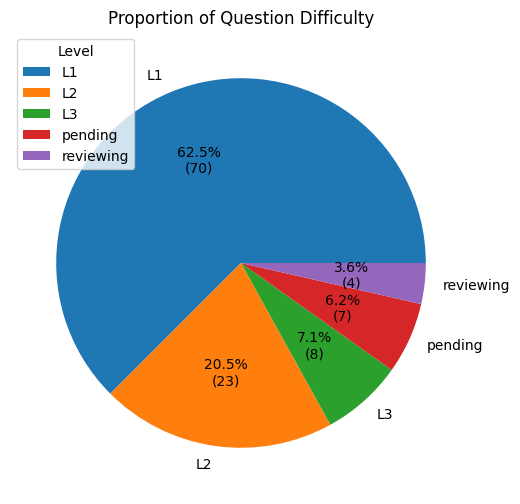

In [10]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

level = subject_xml1_df['level'].value_counts()

# declaring data 
data = level.values
keys = list(level.keys())

plt.figure(figsize=(6,6))

# plotting data on chart 
# plt.pie(data, labels=keys, autopct='%.0f%%')
plt.pie(data, labels=keys, autopct=autopct_format(data))

# Set the legend
plt.legend(title="Level", loc='upper left')

plt.title("Proportion of Question Difficulty")

# displaying chart 
plt.show()


### Show all difficulty level each subject

Total Number of Question: 112


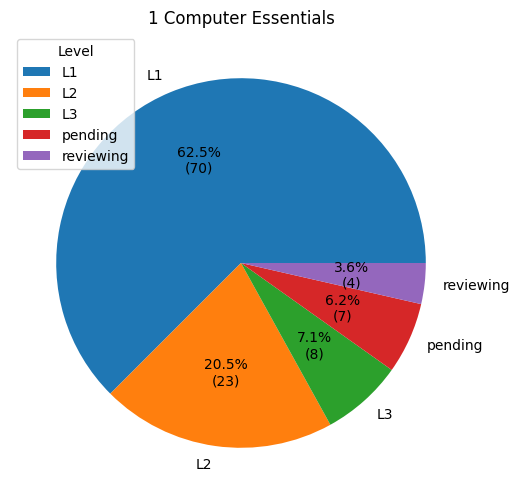

Subject 1 [['L1', 'L2', 'L3', 'pending', 'reviewing'], array([70, 23,  8,  7,  4])] 

Total Number of Question: 16


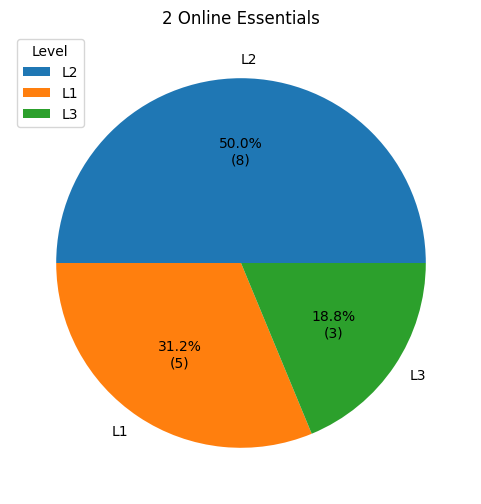

Subject 2 [['L2', 'L1', 'L3'], array([8, 5, 3])] 

Total Number of Question: 67


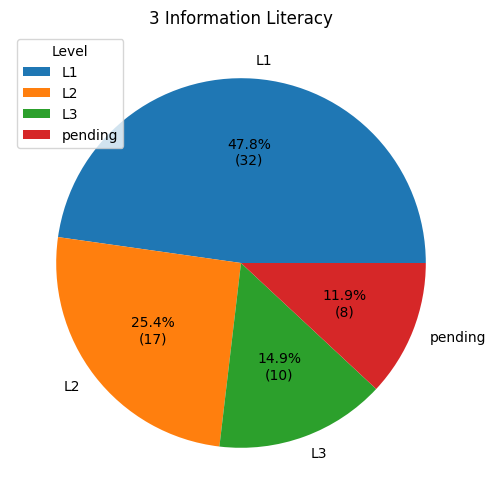

Subject 3 [['L1', 'L2', 'L3', 'pending'], array([32, 17, 10,  8])] 

Total Number of Question: 46


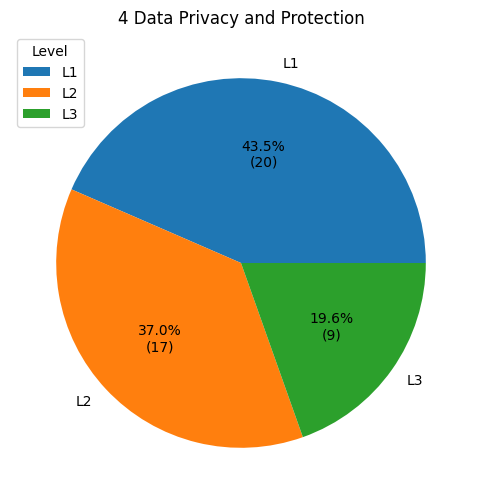

Subject 4 [['L1', 'L2', 'L3'], array([20, 17,  9])] 

Total Number of Question: 83


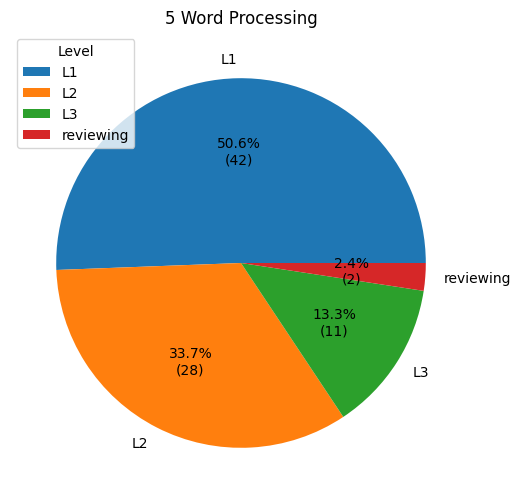

Subject 5 [['L1', 'L2', 'L3', 'reviewing'], array([42, 28, 11,  2])] 

Total Number of Question: 70


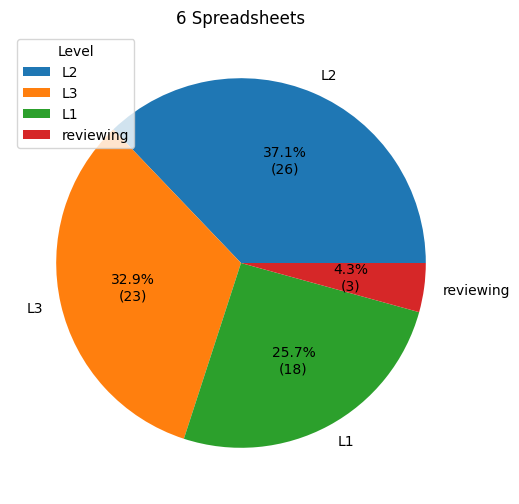

Subject 6 [['L2', 'L3', 'L1', 'reviewing'], array([26, 23, 18,  3])] 

Total Number of Question: 62


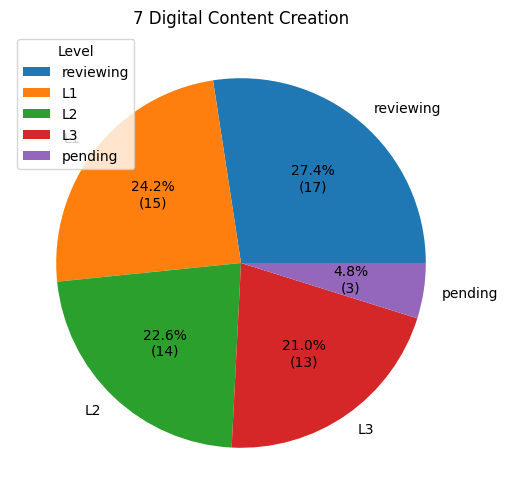

Subject 7 [['reviewing', 'L1', 'L2', 'L3', 'pending'], array([17, 15, 14, 13,  3])] 

Total Number of Question: 51


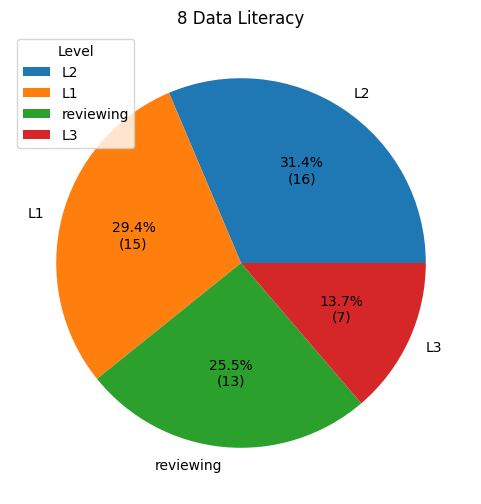

Subject 8 [['L2', 'L1', 'reviewing', 'L3'], array([16, 15, 13,  7])] 

Total Number of Question: 50


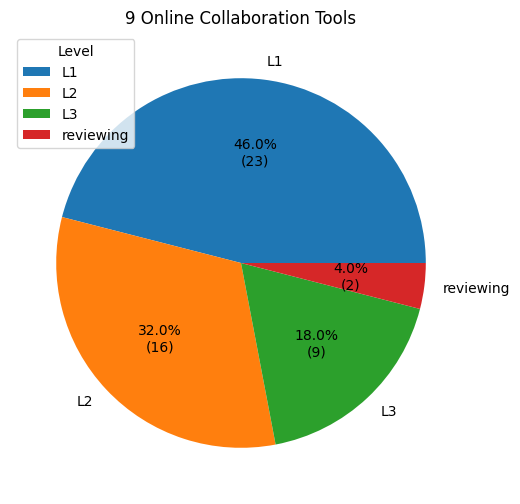

Subject 9 [['L1', 'L2', 'L3', 'reviewing'], array([23, 16,  9,  2])] 

Total Number of Question: 70


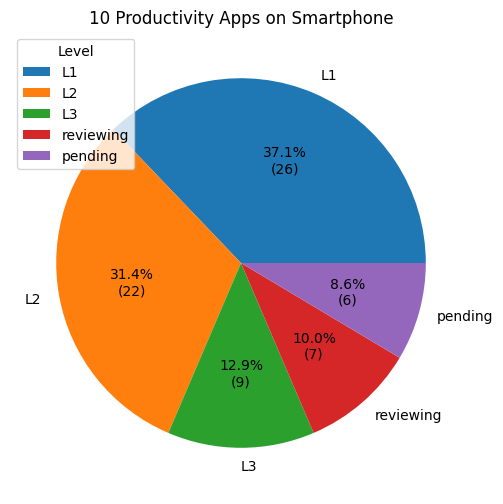

Subject 10 [['L1', 'L2', 'L3', 'reviewing', 'pending'], array([26, 22,  9,  7,  6])] 

Total Number of Question: 26


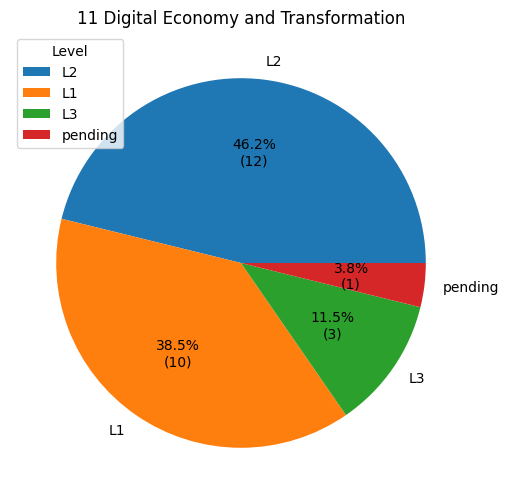

Subject 11 [['L2', 'L1', 'L3', 'pending'], array([12, 10,  3,  1])] 

Total Number of Question: 37


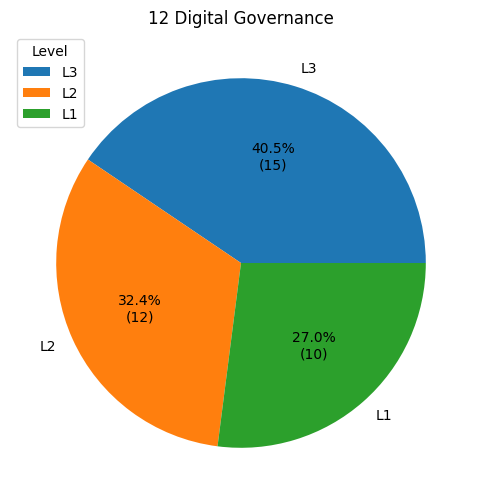

Subject 12 [['L3', 'L2', 'L1'], array([15, 12, 10])] 



In [11]:
xml1 = level_value_and_labels('./data_source_xml/1.xml', '1 Computer Essentials')
print('Subject 1', xml1, '\n')

xml2 = level_value_and_labels('./data_source_xml/2.xml', '2 Online Essentials')
print('Subject 2', xml2, '\n')

xml3 = level_value_and_labels('./data_source_xml/3.xml', '3 Information Literacy')
print('Subject 3', xml3, '\n')

xml4 = level_value_and_labels('./data_source_xml/4.xml', '4 Data Privacy and Protection')
print('Subject 4', xml4, '\n')

xml5 = level_value_and_labels('./data_source_xml/5.xml', '5 Word Processing')
print('Subject 5', xml5, '\n')

xml6 = level_value_and_labels('./data_source_xml/6.xml', '6 Spreadsheets')
print('Subject 6', xml6, '\n')

xml7 = level_value_and_labels('./data_source_xml/7.xml', '7 Digital Content Creation')
print('Subject 7', xml7, '\n')

xml8 = level_value_and_labels('./data_source_xml/8.xml', '8 Data Literacy')
print('Subject 8', xml8, '\n')

xml9 = level_value_and_labels('./data_source_xml/9.xml', '9 Online Collaboration Tools')
print('Subject 9', xml9, '\n')

xml10 = level_value_and_labels('./data_source_xml/10.xml', '10 Productivity Apps on Smartphone')
print('Subject 10', xml10, '\n')

xml11 = level_value_and_labels('./data_source_xml/11.xml', '11 Digital Economy and Transformation')
print('Subject 11', xml11, '\n')

xml12 = level_value_and_labels('./data_source_xml/12.xml', '12 Digital Governance')
print('Subject 12', xml12, '\n')

## 3. Read QuestionStats

#### Read Excel File

In [12]:
df_q_state = pd.read_excel('./data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់/DSE-EXAM-ERA5-Senate-វិញ្ញាសាប្រឡង-questionstats.xlsx', sheet_name=1)
df_q_state.columns = df_q_state.columns.str.lower()
df_q_state.head(2)

,q#,question type,question name,attempts,facility index,standard deviation,random guess score,intended weight,effective weight,discrimination index,discriminative efficiency
0,1.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,58.81%,49.10%,NaN,1.00%,0.96%,24.23%,29.61%
1,2.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,57.99%,49.05%,NaN,1.00%,0.98%,25.71%,31.29%


#### Change Facility Index from String to Float

In [13]:

facility_index_rate = []
for facility_index in df_q_state['facility index']:
    facility_index = facility_index[:-1]
    # print(facility_index)
    facility_index_rate.append(float(facility_index))

df_q_state['facility index'] = facility_index_rate
df_q_state.head(2)

,q#,question type,question name,attempts,facility index,standard deviation,random guess score,intended weight,effective weight,discrimination index,discriminative efficiency
0,1.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,58.81,49.10%,NaN,1.00%,0.96%,24.23%,29.61%
1,2.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,57.99,49.05%,NaN,1.00%,0.98%,25.71%,31.29%


#### Set Question Difficulty Level

In [14]:
df_q_state.loc[df_q_state['facility index'] <= float(60), 'label_facility_index'] = 'L3'
df_q_state.loc[(df_q_state['facility index'] > float(60)) & (df_q_state['facility index'] <= float(80)), 'label_facility_index'] = 'L2'
df_q_state.loc[(df_q_state['facility index'] > float(80)) & (df_q_state['facility index'] <= float(100)), 'label_facility_index'] = 'L1'

df_q_state.head(2)

,q#,question type,question name,attempts,facility index,standard deviation,random guess score,intended weight,effective weight,discrimination index,discriminative efficiency,label_facility_index
0,1.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,58.81,49.10%,NaN,1.00%,0.96%,24.23%,29.61%,L3
1,2.0,Random,Random (០១​. កុំព្យូទ័រចាំបាច់ and subcategori...,670,57.99,49.05%,NaN,1.00%,0.98%,25.71%,31.29%,L3


In [15]:
df_q_state.groupby(['question type']).count()

,q#,question name,attempts,facility index,standard deviation,random guess score,intended weight,effective weight,discrimination index,discriminative efficiency,label_facility_index
question type,,,,,,,,,,,
Drag and drop into text,13,13,13,13,13,13,13,0,13,13,13
Drag and drop markers,6,6,6,6,6,0,6,0,6,6,6
Drag and drop onto image,6,6,6,6,6,6,6,0,6,6,6
Matching,42,42,42,42,42,42,42,0,42,42,42
Multiple choice,260,260,260,260,260,221,260,0,260,260,260
Random,100,100,100,100,100,0,100,100,100,100,100
Select missing words,1,1,1,1,1,1,1,0,1,1,1
True/False,3,3,3,3,3,3,3,0,3,3,3


In [16]:
df_q_state.groupby(['question type']).sum()

,q#,attempts,facility index
question type,,,
Drag and drop into text,864.82,3188,778.06
Drag and drop markers,226.66,1143,311.98
Drag and drop onto image,385.96,1375,405.48
Matching,2391.45,9242,2841.81
Multiple choice,13437.86,51080,14482.71
Random,5050.00,67000,5821.71
Select missing words,76.10,367,72.59
True/False,108.36,605,153.75


#### Find most attempted and most appeared question type

In [17]:
# Question that most attempted
maxx = df_q_state[df_q_state['attempts'] == df_q_state['attempts'].max()]
print("Type of question that is most attempted:", maxx['question type'].unique()[0])

Type of question that is most attempted: Random


In [18]:
def find_most_attempted_question(path):
    df_q_state = pd.read_excel(path, sheet_name=1)
    df_q_state.columns = df_q_state.columns.str.lower()
    
    facility_index_rate = []
    for facility_index in df_q_state['facility index']:
        facility_index = facility_index[:-1]
        facility_index_rate.append(float(facility_index))

    df_q_state['facility index'] = facility_index_rate
    print(df_q_state['question type'].unique())
    print(len(df_q_state['question type'].unique()))

    # Question that most attempted
    maxx = df_q_state[df_q_state['attempts'] == df_q_state['attempts'].max()]
    print("Type of question that is most attempted:", maxx['question type'].unique()[0])

    print("Sum of Attemtps", df_q_state['attempts'].sum())

    print()


In [19]:
def find_most_appeared_question_type(path):
    df = pd.read_excel(path, sheet_name=1)
    # print(df['Question type'].value_counts())

    q_type = df['Question type'].value_counts()

    # declaring data 
    data = q_type.values
    keys = list(q_type.keys())

    plt.figure(figsize=(7,7))

    # plotting data on chart 
    plt.pie(data, labels=keys, autopct='%.0f%%')
    # plt.pie(data, labels=keys, autopct=autopct_format(data))

    # Set the legend
    # plt.legend(title="Level", loc='upper left')
    # plt.legend(title="Level")

    plt.title("Proportion of Question Type")

    # displaying chart 
    plt.show()


Amount of CSV file:  20
data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (ខេត្តព្រះវិហា ឧត្តមានជ័យ សៀមរាប-៧)/Exam-PVH-UDM-7-ប្រឡង-questionstats.xlsx


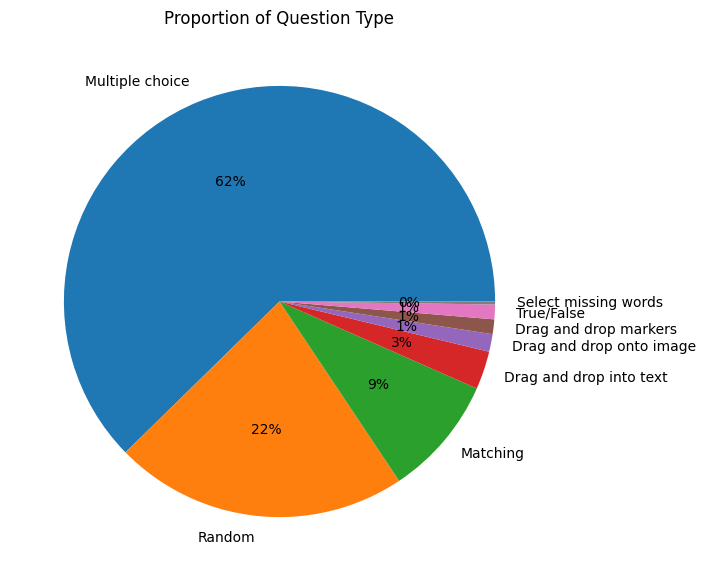

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់/DSE-EXAM-ERA5-Senate-វិញ្ញាសាប្រឡង-questionstats.xlsx


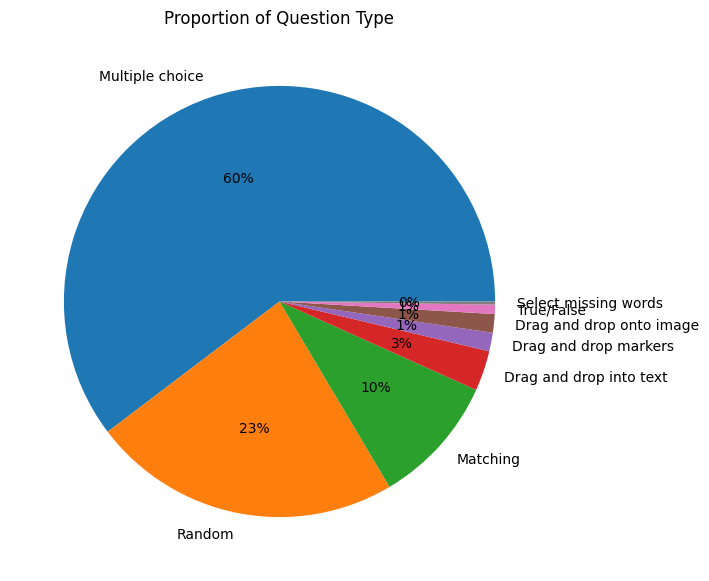

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ខេត្តកែប-កំពត-ព្រះសីហនុ-កោះកុង/questionstats.xlsx


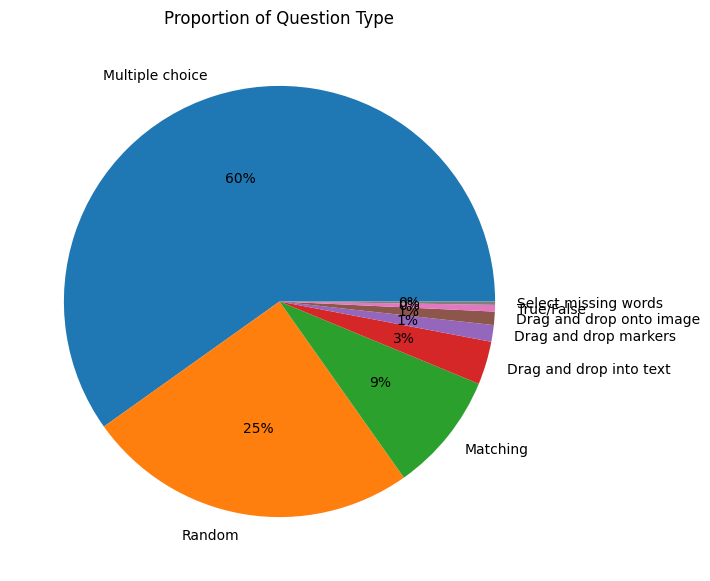

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (Senate-City Hall & Moeys)/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់(2022)-ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់-questionstats.xlsx


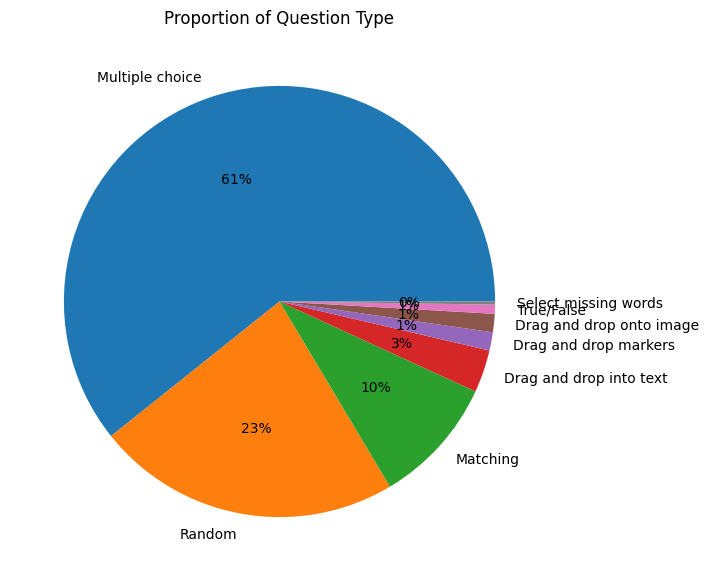

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ខេត្តបន្ទាយមានជ័យ -​ ខេត្តបាត់ដំបង -ពោធិ៍សាត់ -កំពង់ឆ្នាំង-ប៉ៃលិន (DSE-09)/questionstats.xlsx


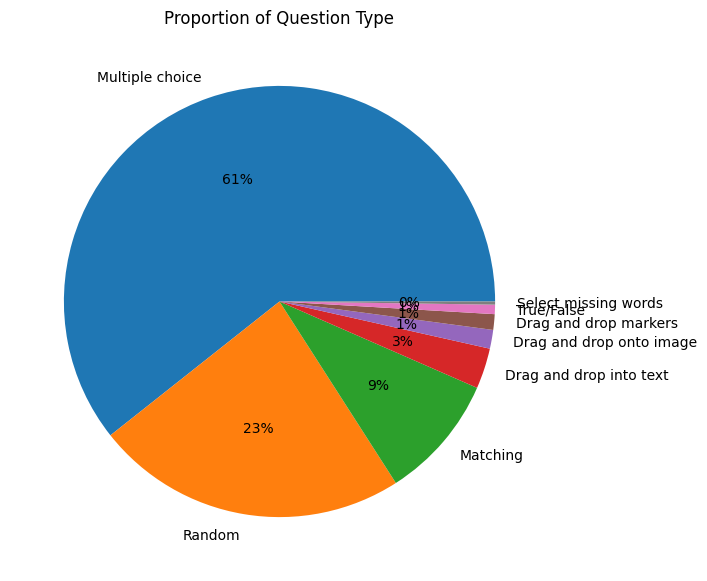

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ នៃក្រសួងប្រៃសណីយ៍ និងទូរគមនាគមន៍-8/ប្រឡងវិញ្ញាបនបត្រក្រសួងប្រៃសណីយ៍ និងទូរគមនាគមន៍-ប្រឡងវិញ្ញាបនបត្រ DSE (ក្រសួងប្រៃសណីយ៍ និងទូរគមនាគមន៍-8)-questionstats.xlsx


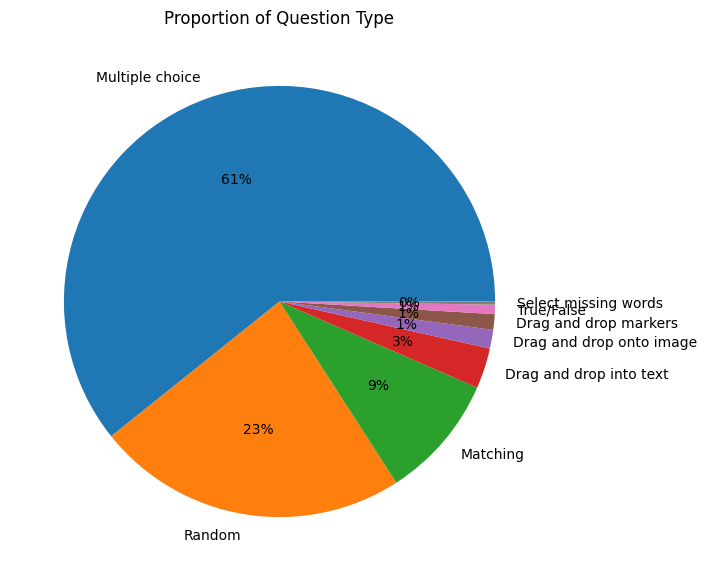

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (CADT)/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (CADT-1)-Exam-questionstats.xlsx


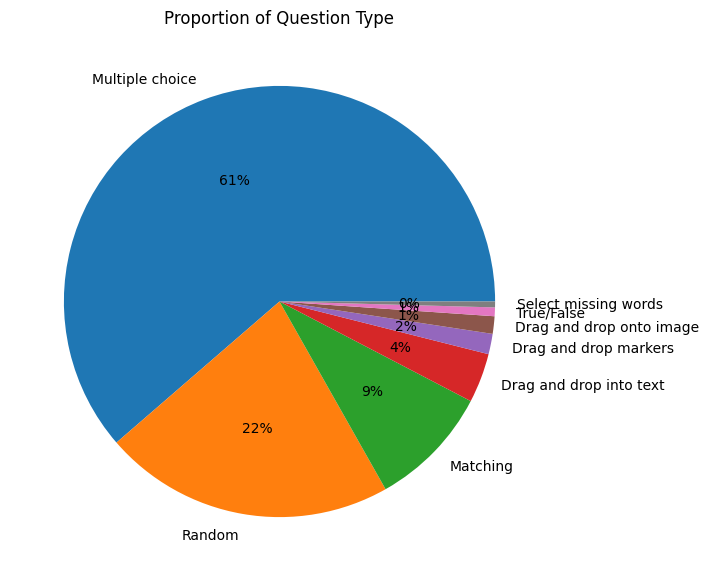

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (ខេត្ត-6)/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់(2022)-ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់-questionstats.xlsx


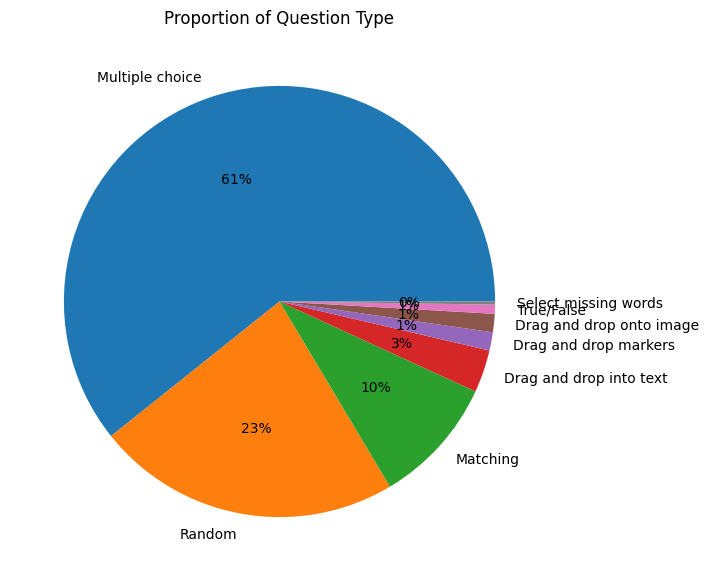

In [20]:
excel_data_paths = glob.glob('data_source/**/*.xlsx', recursive=True)
print("Amount of CSV file: ", len(excel_data_paths))
# print("Excel Data:", excel_data_paths)

for path in excel_data_paths:
    if('questionstats' in path):
        print(path)

        # find_most_attempted_question(path)
        find_most_appeared_question_type(path)
        

#### Get value and label for visualization on Level

In [21]:
l1 = len(df_q_state[df_q_state['label_facility_index'] == 'L1'])
l2 = len(df_q_state[df_q_state['label_facility_index'] == 'L2'])
l3 = len(df_q_state[df_q_state['label_facility_index'] == 'L3'])


labels = df_q_state['label_facility_index'].unique().tolist()
labels

['L3', 'L2', 'L1']

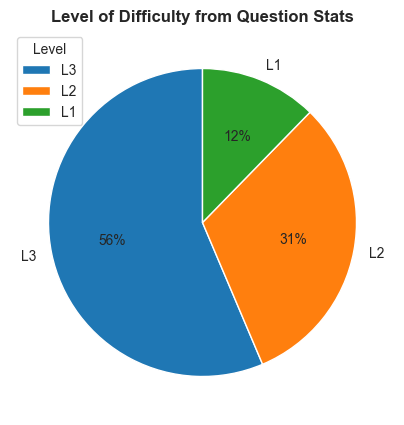

In [22]:
# Create an array of values
values = [l3, l2, l1]

# Create a list of labels
labels = labels

# Create a pie chart
sns.set_style("whitegrid")
plt.figure(figsize=(5,5))
plt.pie(values, labels=labels, autopct='%1.0f%%', startangle=90)
# plt.pie(values, labels=labels)

# Set the title
plt.title('Level of Difficulty from Question Stats', fontweight='bold')

# Set the legend
plt.legend(title="Level", loc='upper left')

# Show the chart
plt.show()


In [23]:
# import matplotlib.font_manager as fm

# # fetch the name of font that was installed
# path = './font/KhmerOS.ttf'
# fontprop = fm.FontProperties(fname=path)
# x = np.array(["A", "B", "C", "D"])
# y = np.array([3, 8, 1, 10])

# plt.bar(x,y)
# plt.title("សាកា", fontproperties=fontprop)
# plt.show()

#### Display All Questionstats from Function

In [24]:
excel_data_paths = glob.glob('data_source/**/*.xlsx', recursive=True)
print("Amount of CSV file: ", len(excel_data_paths))
# print("Excel Data:", excel_data_paths)

Amount of CSV file:  20


In [25]:
for path in excel_data_paths:
    if('questionstats' in path):
        print(path)

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (ខេត្តព្រះវិហា ឧត្តមានជ័យ សៀមរាប-៧)/Exam-PVH-UDM-7-ប្រឡង-questionstats.xlsx
data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់/DSE-EXAM-ERA5-Senate-វិញ្ញាសាប្រឡង-questionstats.xlsx
data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ខេត្តកែប-កំពត-ព្រះសីហនុ-កោះកុង/questionstats.xlsx
data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (Senate-City Hall & Moeys)/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់(2022)-ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់-questionstats.xlsx
data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ខេត្តបន្ទាយមានជ័យ -​ ខេត្តបាត់ដំបង -ពោធិ៍សាត់ -កំពង់ឆ្នាំង-ប៉ៃលិន (DSE-09)/questionstats.xlsx
data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ នៃក្រសួងប្រៃសណីយ៍ និងទូរគមនាគមន៍-8/ប្រឡងវិញ្ញាបនបត្រក្រសួងប្រៃសណីយ៍ និងទូរគមនាគមន៍-ប្រឡងវិញ្ញាបនបត្រ DSE (ក្រសួងប្រៃសណីយ៍ និងទូរគមនាគមន៍-8)-questionstats.xlsx
data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (CADT)/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (CADT-1)-Exam-questionstats.xlsx
data_source/ប្រឡងវិញ្ញាបនបត្រជំនា

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (ខេត្តព្រះវិហា ឧត្តមានជ័យ សៀមរាប-៧)/Exam-PVH-UDM-7-ប្រឡង-questionstats.xlsx


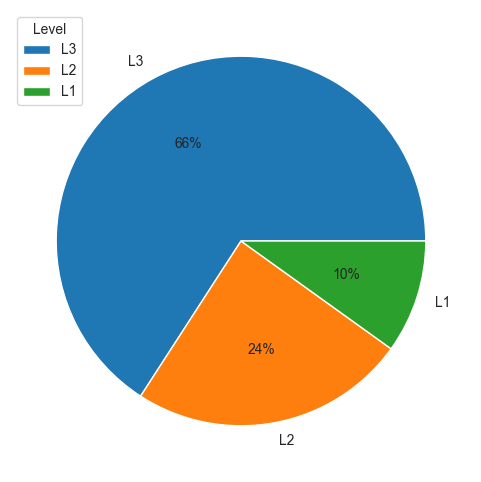

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់/DSE-EXAM-ERA5-Senate-វិញ្ញាសាប្រឡង-questionstats.xlsx


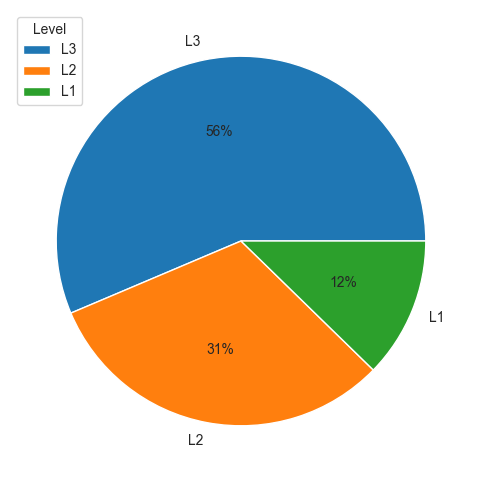

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ខេត្តកែប-កំពត-ព្រះសីហនុ-កោះកុង/questionstats.xlsx


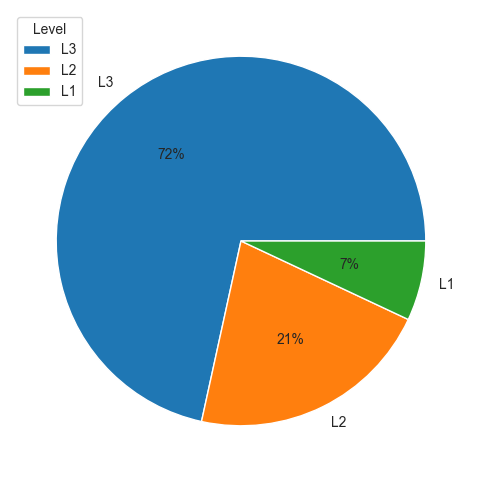

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (Senate-City Hall & Moeys)/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់(2022)-ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់-questionstats.xlsx


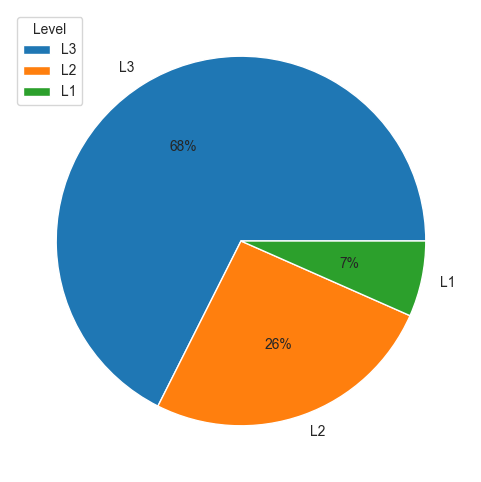

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ខេត្តបន្ទាយមានជ័យ -​ ខេត្តបាត់ដំបង -ពោធិ៍សាត់ -កំពង់ឆ្នាំង-ប៉ៃលិន (DSE-09)/questionstats.xlsx


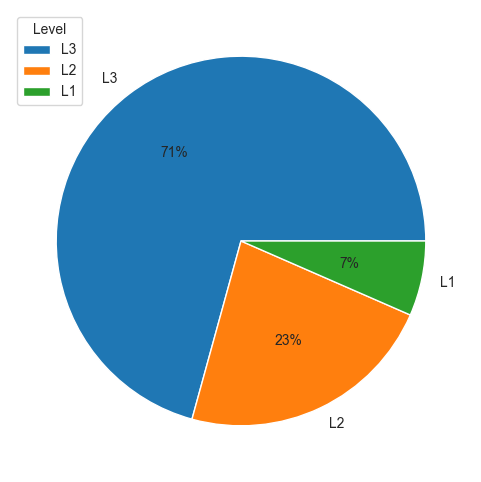

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ នៃក្រសួងប្រៃសណីយ៍ និងទូរគមនាគមន៍-8/ប្រឡងវិញ្ញាបនបត្រក្រសួងប្រៃសណីយ៍ និងទូរគមនាគមន៍-ប្រឡងវិញ្ញាបនបត្រ DSE (ក្រសួងប្រៃសណីយ៍ និងទូរគមនាគមន៍-8)-questionstats.xlsx


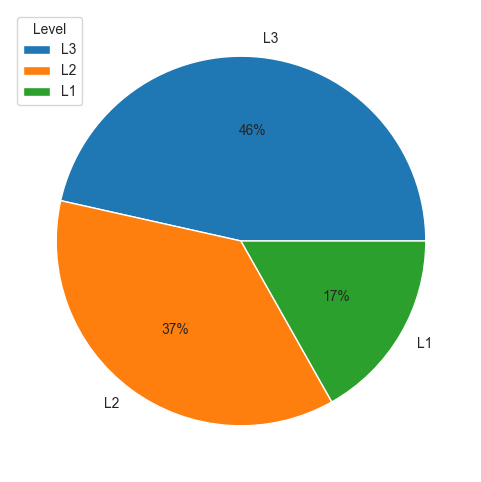

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (CADT)/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (CADT-1)-Exam-questionstats.xlsx


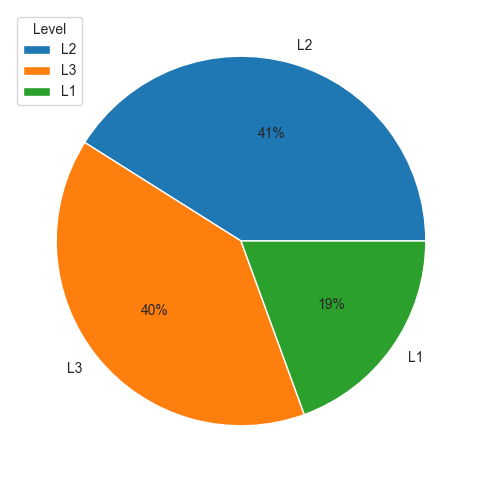

data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (ខេត្ត-6)/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់(2022)-ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់-questionstats.xlsx


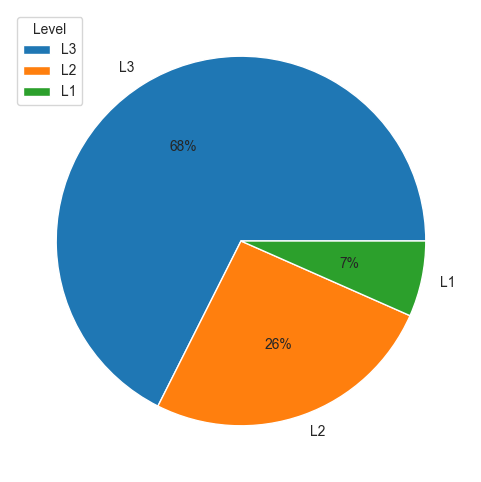

[['L3', 'L2', 'L1'], [296, 113, 29]]

In [26]:
display_questionstat('data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (ខេត្តព្រះវិហា ឧត្តមានជ័យ សៀមរាប-៧)/Exam-PVH-UDM-7-ប្រឡង-questionstats.xlsx')
display_questionstat('data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់/DSE-EXAM-ERA5-Senate-វិញ្ញាសាប្រឡង-questionstats.xlsx')
display_questionstat('data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ខេត្តកែប-កំពត-ព្រះសីហនុ-កោះកុង/questionstats.xlsx')
display_questionstat('data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (Senate-City Hall & Moeys)/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់(2022)-ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់-questionstats.xlsx')
display_questionstat('data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ខេត្តបន្ទាយមានជ័យ -​ ខេត្តបាត់ដំបង -ពោធិ៍សាត់ -កំពង់ឆ្នាំង-ប៉ៃលិន (DSE-09)/questionstats.xlsx')
display_questionstat('data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ នៃក្រសួងប្រៃសណីយ៍ និងទូរគមនាគមន៍-8/ប្រឡងវិញ្ញាបនបត្រក្រសួងប្រៃសណីយ៍ និងទូរគមនាគមន៍-ប្រឡងវិញ្ញាបនបត្រ DSE (ក្រសួងប្រៃសណីយ៍ និងទូរគមនាគមន៍-8)-questionstats.xlsx')
display_questionstat('data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (CADT)/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (CADT-1)-Exam-questionstats.xlsx')
display_questionstat('data_source/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់ (ខេត្ត-6)/ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់(2022)-ប្រឡងវិញ្ញាបនបត្រជំនាញឌីជីថលចាំបាច់-questionstats.xlsx')

In [27]:
# for path in excel_data_paths:
#     if('questionstats' in path):
#         print(path)

#         display_questionstat(path)